In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math
import seaborn as sns

In [252]:
#loading the excel file containing the closing prices of major indics
data=pd.read_csv("C:\\Users\\gaurav.rungta\\Desktop\\Python Cohort\\Data\\TOTM.csv")
data.head()

,Date,nifty,ftse,nasdaq,nikkei,dax,s&p
0,1/3/2005,2115.00,NaN,2152.15,NaN,4291.53,1202.1
1,1/4/2005,2103.75,4847.0,2107.86,11517.75,4290.50,1188.0
2,1/5/2005,2032.20,4806.0,2091.24,11437.52,4258.24,1183.7
3,1/6/2005,1998.35,4824.3,2090.00,11492.26,4300.94,1187.9
4,1/7/2005,2015.50,4854.1,2088.61,11433.24,4316.40,1186.2


In [253]:
#adding % gain columns

data['Date']=pd.to_datetime(data['Date'])
data['Day_of_month']=data['Date'].dt.day
data['ftse%']=np.log(data['ftse']/data['ftse'].shift(1))
data['nasdaq%']=np.log(data['nasdaq']/data['nasdaq'].shift(1))
data['nikkei%']=np.log(data['nikkei']/data['nikkei'].shift(1))
data['dax%']=np.log(data['dax']/data['dax'].shift(1))
data['s&p%']=np.log(data['s&p']/data['s&p'].shift(1))
data.head()

,Date,nifty,ftse,nasdaq,nikkei,dax,s&p,Day_of_month,ftse%,nasdaq%,nikkei%,dax%,s&p%
0,2005-01-03,2115.00,NaN,2152.15,NaN,4291.53,1202.1,3,NaN,NaN,NaN,NaN,NaN
1,2005-01-04,2103.75,4847.0,2107.86,11517.75,4290.50,1188.0,4,NaN,-0.020794,NaN,-0.000240,-0.011799
2,2005-01-05,2032.20,4806.0,2091.24,11437.52,4258.24,1183.7,5,-0.008495,-0.007916,-0.006990,-0.007547,-0.003626
3,2005-01-06,1998.35,4824.3,2090.00,11492.26,4300.94,1187.9,6,0.003801,-0.000593,0.004775,0.009978,0.003542
4,2005-01-07,2015.50,4854.1,2088.61,11433.24,4316.40,1186.2,7,0.006158,-0.000665,-0.005149,0.003588,-0.001432


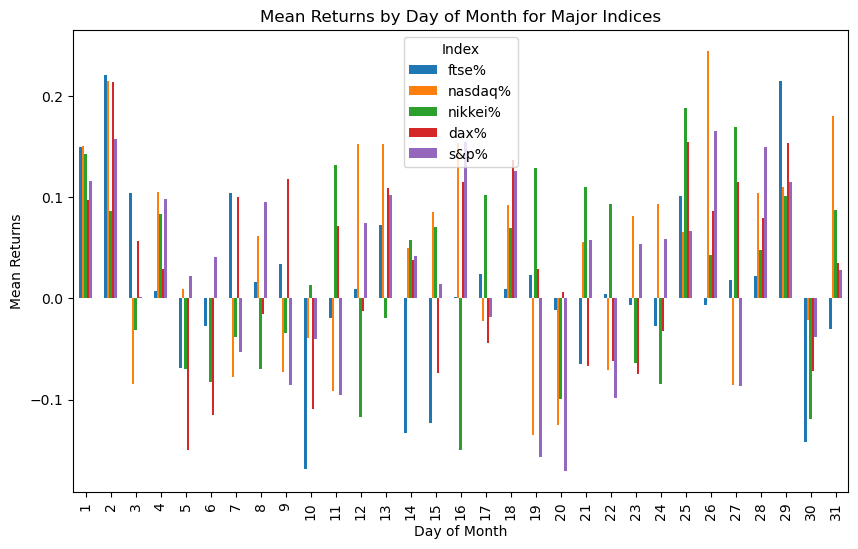

In [254]:
#excluding columns of data and plotting returns by day of month
columns=['ftse%','nasdaq%','nikkei%','dax%','s&p%']
grouped_data = data.groupby('Day_of_month')[columns].mean()*100
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of Month')
plt.ylabel('Mean Returns')
plt.title('Mean Returns by Day of Month for Major Indices')
plt.legend(title='Index')
plt.show()

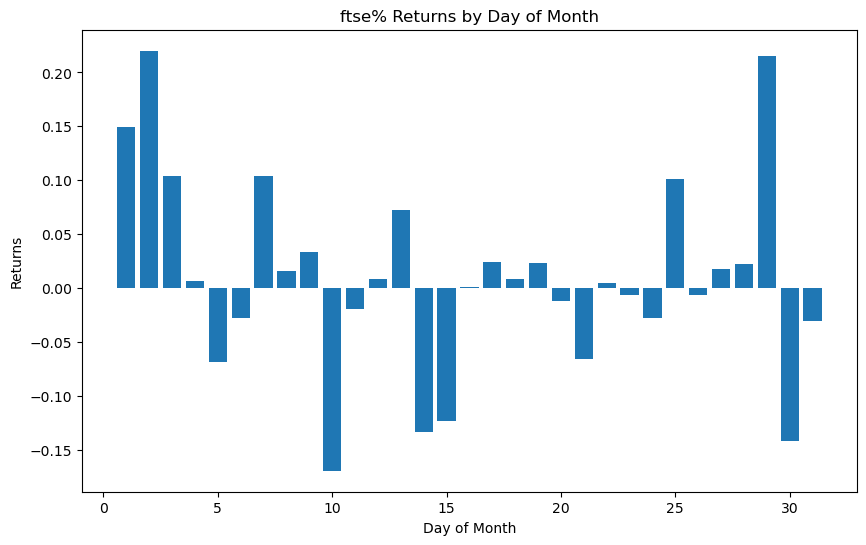

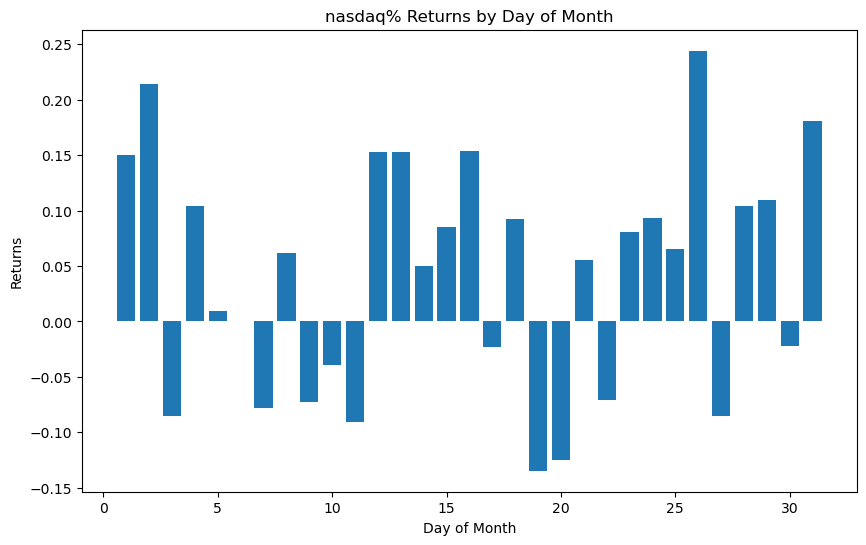

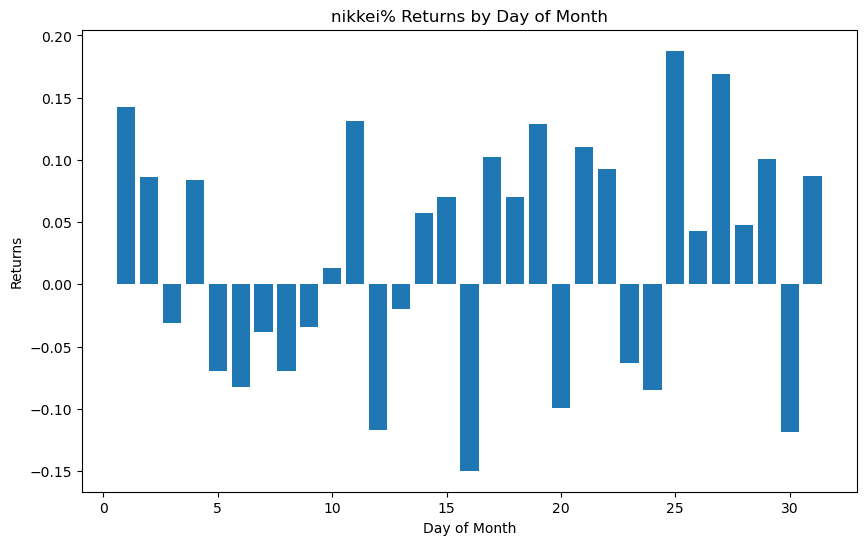

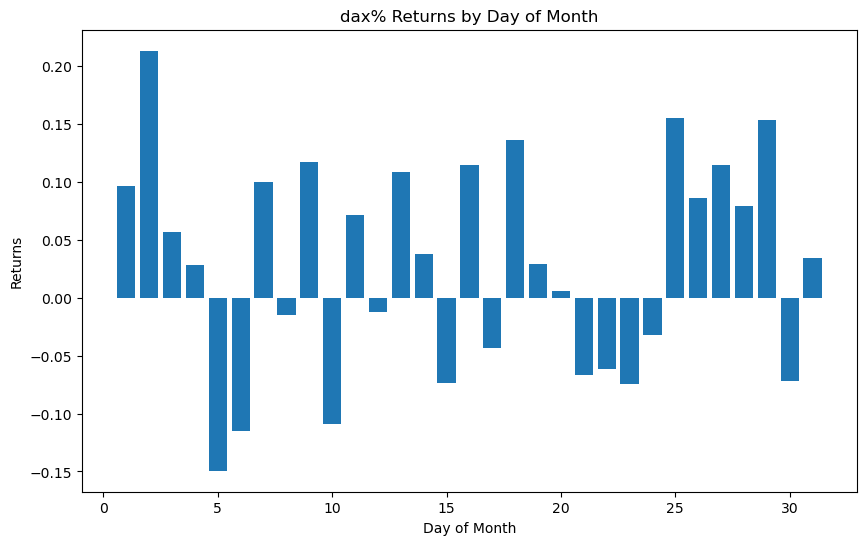

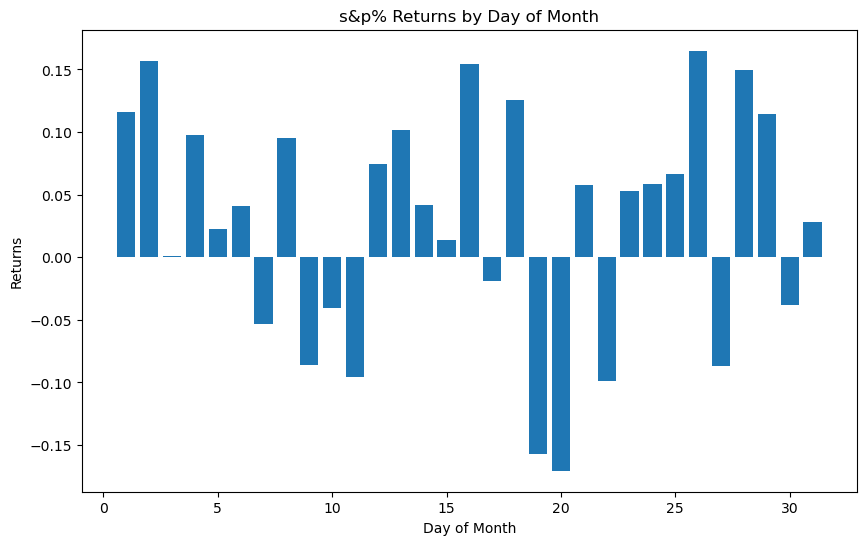

In [255]:
# plotting each index separately
for column in columns:
    grouped_data = data.groupby('Day_of_month')[column].mean()*100
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data.index, grouped_data.values)
    plt.xlabel('Day of Month')
    plt.ylabel('Returns')
    plt.title(f'{column} Returns by Day of Month')
    plt.show()

# Roughly eyeballing to see that turn of the month is positive for all major indices 

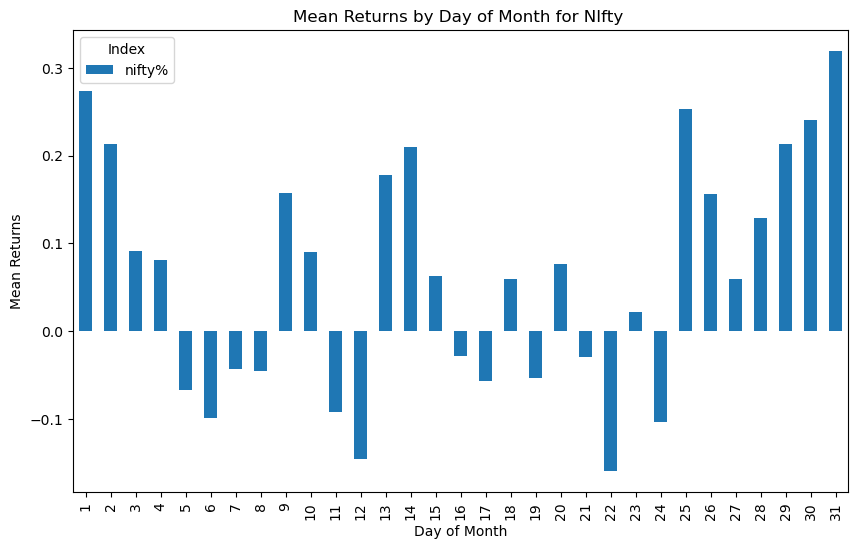

In [283]:
#plotting nifty gains by day of the month
data['year']=data['Date'].dt.year
data['nifty%']=((data['nifty']/data['nifty'].shift(1))-1)
columns=['nifty%']
grouped_data = data.groupby('Day_of_month')[columns].mean()*100
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of Month')
plt.ylabel('Mean Returns')
plt.title('Mean Returns by Day of Month for NIfty ')
plt.legend(title='Index')
plt.show()

In [258]:
# Turn of the month looks to be a strong effect in nifty. roughly from 25th - 2nd .

In [259]:
#finding the last trading day (ltd) and assigning days prior and post ltd

In [260]:
# we consider 4 days prior and two days post ltd for the effect

In [261]:
data.head()
df=data[['Date','nifty','Day_of_month','nifty%']]
df.head()

,Date,nifty,Day_of_month,nifty%
0,2005-01-03,2115.00,3,NaN
1,2005-01-04,2103.75,4,-0.005319
2,2005-01-05,2032.20,5,-0.034011
3,2005-01-06,1998.35,6,-0.016657
4,2005-01-07,2015.50,7,0.008582


In [262]:
#determine last trading day of the month
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
ltd=df.groupby(['Year','Month']).tail(1)  # ltd is last trading day
print(ltd[['Year', 'Month', 'Date']])

      Year  Month       Date
18    2005      1 2005-01-31
38    2005      2 2005-02-28
60    2005      3 2005-03-31
80    2005      4 2005-04-29
102   2005      5 2005-05-31
...    ...    ...        ...
4504  2023      2 2023-02-28
4525  2023      3 2023-03-31
4542  2023      4 2023-04-28
4564  2023      5 2023-05-31
4569  2023      6 2023-06-07

[222 rows x 3 columns]


In [263]:
# creating a blank column for returns
totm_returns = pd.DataFrame(columns=['Year', 'Month', 'Return'])


In [264]:
for _, row in ltd.iterrows():
    month = row['Month']
    year = row['Year']
    date = row['Date']
    target_dates = df[(df['Month'] == month) & (df['Year'] == year)]['Date']
    target_indexes = target_dates.index
    
# calculate returns for the four days prior and two days later from the last trading day

    for i in range(target_indexes[0] - 4, target_indexes[0] + 3):
        if i >= 0 and i < len(df):
            returns = (df.at[i+1, 'nifty%'])
            totm_returns = totm_returns.append({'Year': year, 'Month': month, 'Return': returns}, ignore_index=True)   

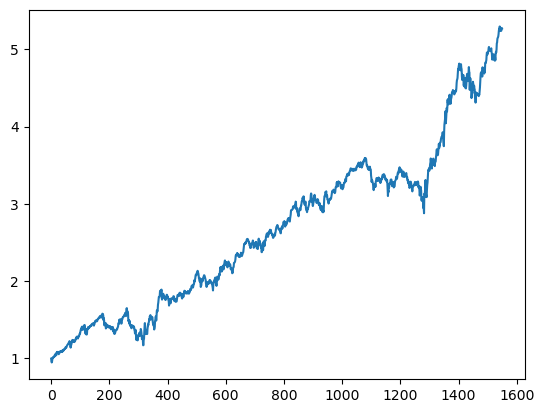

In [265]:
#calculating the equity curve
equity_curve = (1 + totm_returns['Return']).cumprod()
count = len(totm_returns)
buy_hold = (1+data['nifty%']).cumprod()
plt.plot(equity_curve)



In [267]:
#statistics for individual trades
stats= totm_returns['Return'].describe()
print(stats)
print("count:",count)

count    1550.000000
mean        0.001158
std         0.013081
min        -0.058439
25%        -0.004721
50%         0.001350
75%         0.007690
max         0.087632
Name: Return, dtype: float64
count: 1550


In [269]:
# t test and p value
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(totm_returns['Return'], 0)
print("\nT-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 3.485819734477014
P-Value: 0.000504319642216215


# Monty Carlo of results vs random sampling

In [270]:
simulations =10000
rand_ret = np.zeros(simulations)

# Generate random samples of length = totm  and calculate cumulative returns for randoms
for i in range(simulations):
    random_sample = np.random.choice(data['nifty%'], size=count, replace=False)
    rand_ret[i] = np.prod(1 + random_sample) - 1

In [271]:
# Calculating cumulative returns for turn of the month effect
totm_cum_ret = np.prod(1 + totm_returns['Return']) - 1

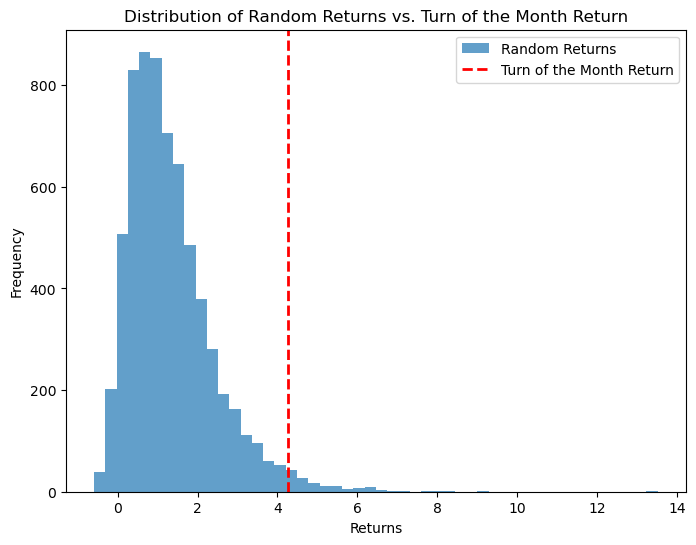

4.269264507897913


In [278]:
# Plot the distribution chart
plt.figure(figsize=(8, 6))
plt.hist(rand_ret, bins=50, alpha=0.7, label='Random Returns')
plt.axvline(x=totm_cum_ret, color='red', linestyle='--', linewidth=2, label='Turn of the Month Return')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Random Returns vs. Turn of the Month Return')
plt.legend()
plt.show()
print(totm_cum_ret)

In [279]:
display(totm_returns)

,Year,Month,Return
0,2005.0,1.0,-0.005319
1,2005.0,1.0,-0.034011
2,2005.0,1.0,-0.016657
3,2005.0,2.0,0.011983
4,2005.0,2.0,0.027263
...,...,...,...
1545,2023.0,6.0,-0.005337
1546,2023.0,6.0,-0.002517
1547,2023.0,6.0,0.002507
1548,2023.0,6.0,0.003224


# Backtest Parameters

In [280]:
wins = len(totm_returns[totm_returns['Return'] > 0])
losses = len(totm_returns[totm_returns['Return'] < 0])
average_win = totm_returns[totm_returns['Return'] > 0]['Return'].mean()
average_loss = totm_returns[totm_returns['Return'] < 0]['Return'].mean()


In [281]:
returns = totm_returns['Return']
risk_free_rate = 0.00  # Assumed risk-free rate of return

volatility = returns.std()
sharpe_ratio = (returns.mean() - risk_free_rate) / returns.std()

downside_returns = returns.copy()
downside_returns[downside_returns > 0] = 0  # Replace positive returns with zero
downside_deviation = np.sqrt((downside_returns ** 2).mean())
sortino_ratio = (returns.mean() - risk_free_rate) / downside_deviation

calmar_ratio = returns.mean() / max_drawdown

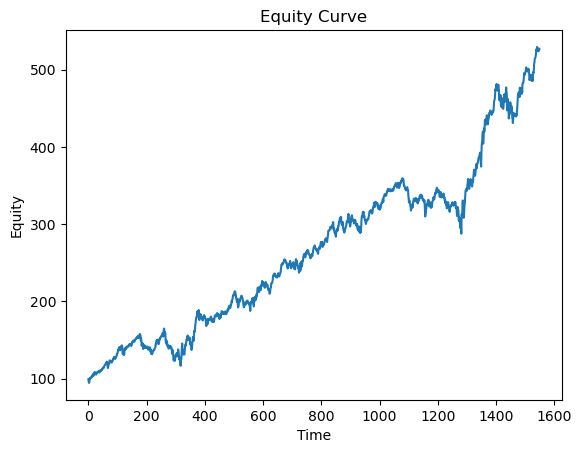

Wins: 866
Losses: 681
Average Win: 0.009221452518574197
Average Loss: -0.009090334168934485
Sharpe Ratio: 0.0885399097956702
Volatility: 0.01308147322551089
Sortino Ratio: 0.13089192535908586
Calmar Ratio: 0.00161929139520497
Returns : 426.93 %
Maximum Drawdown : -29.19 % 


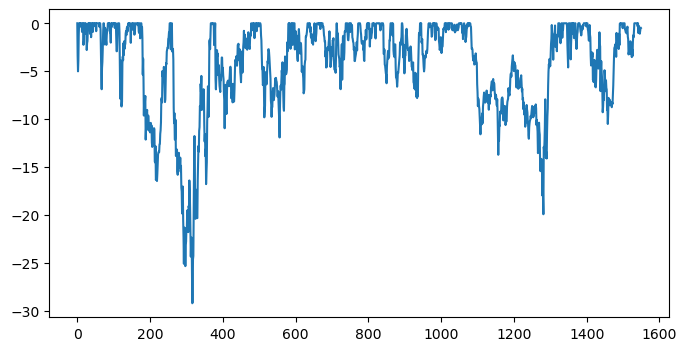

In [285]:
# Plot the equity curve
plt.plot(equity_curve*100)
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title('Equity Curve')
plt.show()

# Print the additional backtest parameters
print("Wins:", wins)
print("Losses:", losses)
print("Average Win:", average_win)
print("Average Loss:", average_loss)
print("Sharpe Ratio:", sharpe_ratio)
print("Volatility:", volatility)
print("Sortino Ratio:", sortino_ratio)
print("Calmar Ratio:", calmar_ratio)

end = equity_curve.iloc[-1]-1

previous_peaks = equity_curve.cummax()
drawdown = (equity_curve - previous_peaks) / previous_peaks
plt.figure(figsize=(8,4))
plt.plot(drawdown*100)
max_dd = drawdown.min()
print(f"Returns : {end*100:.2f} %")
print(f"Maximum Drawdown : {max_dd*100:.2f} % ")

